<a href="https://colab.research.google.com/github/xlxusxls/Autonomous-AI/blob/main/Decision_Tree_with_Parkinson_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

pk = pd.read_csv('/content/sample_data/BCSC/parkinsons.data')  # 이미 pd.DataFrame 형태로 불러와짐
pk


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


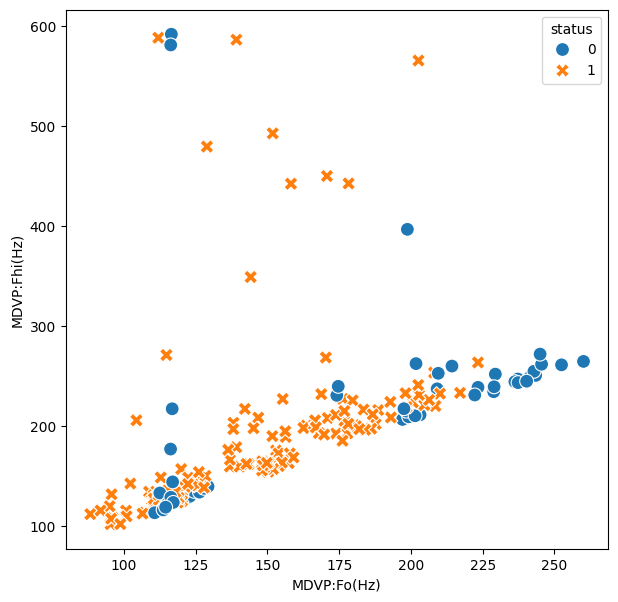

In [14]:
## scatter plot
import seaborn as sns

## x='MDVP:Fo(Hz)' (평균 기초 주파수) / y='MDVP:Fhi(Hz)' (최대 기초 주파수) / hue='status' (파킨슨병 여부, 1: 파킨슨병, 0: 건강) / style='status' (파킨슨병 여부에 따라 모양을 달리하기)
plt.figure(figsize=(7, 7))
sns.scatterplot(x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', hue='status', style='status', s=100, data=pk)
plt.show()

**1) sklearn.tree 메소드를 이용해서 의사결정나무(Decision Tree) 모델 훈련**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = pk[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']]
y = pk['status']

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, y)


## feature importances
dt_clf_model.feature_importances_

array([0.66027342, 0.33972658])

**2) sklearn.tree.export_text 메소드를 이용해서 의사결정나무를 텍스트로 인쇄**

In [18]:
## Text Representation
dt_clf_model_text = tree.export_text(dt_clf_model)

print(dt_clf_model_text)

|--- feature_0 <= 195.05
|   |--- feature_0 <= 132.85
|   |   |--- feature_0 <= 110.72
|   |   |   |--- class: 1
|   |   |--- feature_0 >  110.72
|   |   |   |--- feature_1 <= 123.42
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  123.42
|   |   |   |   |--- feature_1 <= 167.30
|   |   |   |   |   |--- feature_0 <= 121.77
|   |   |   |   |   |   |--- feature_0 <= 117.25
|   |   |   |   |   |   |   |--- feature_0 <= 116.94
|   |   |   |   |   |   |   |   |--- feature_1 <= 128.57
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  128.57
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 129.65
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  129.65
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 112.71
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  112.71
|   |   |   |  

**3) sklearn.tree.plot_tree 메소드와 matplotlib 을 이용해서 의사결정나무 시각화**

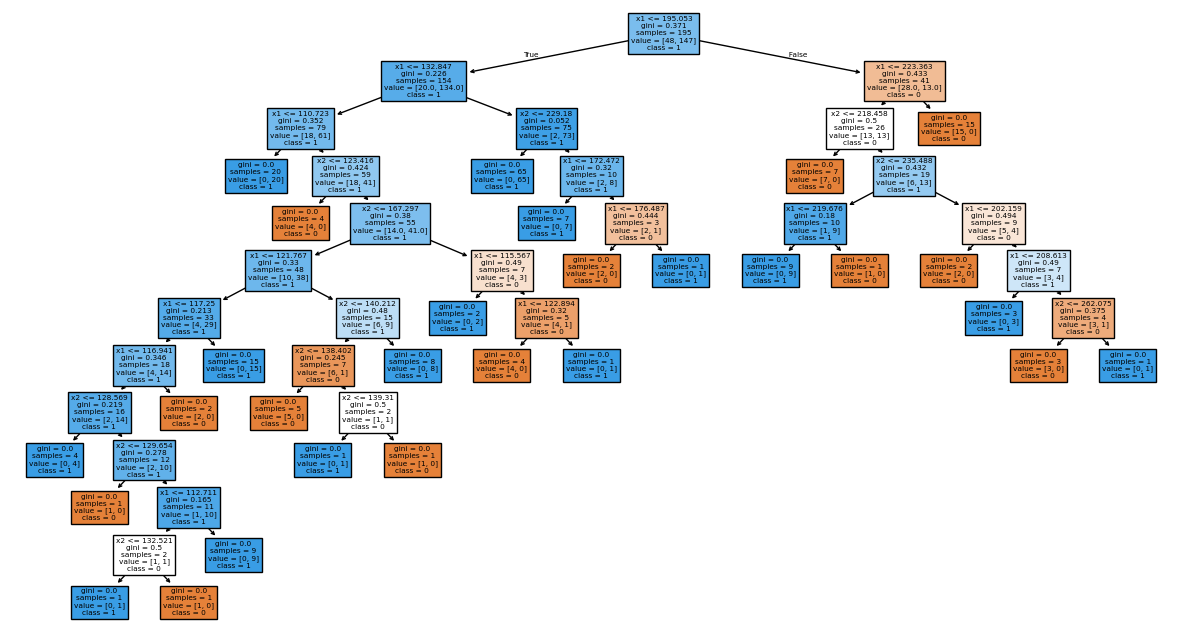

In [20]:
## Plot Tree with plot_tree
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt_clf_model,
                  feature_names=['x1', 'x2'],
                  class_names=['0', '1'],
                  filled=True)

**4) sklearn.tree.export_graphviz 메소드와 graphviz 를 이용해서 의사결정나무 시각화**

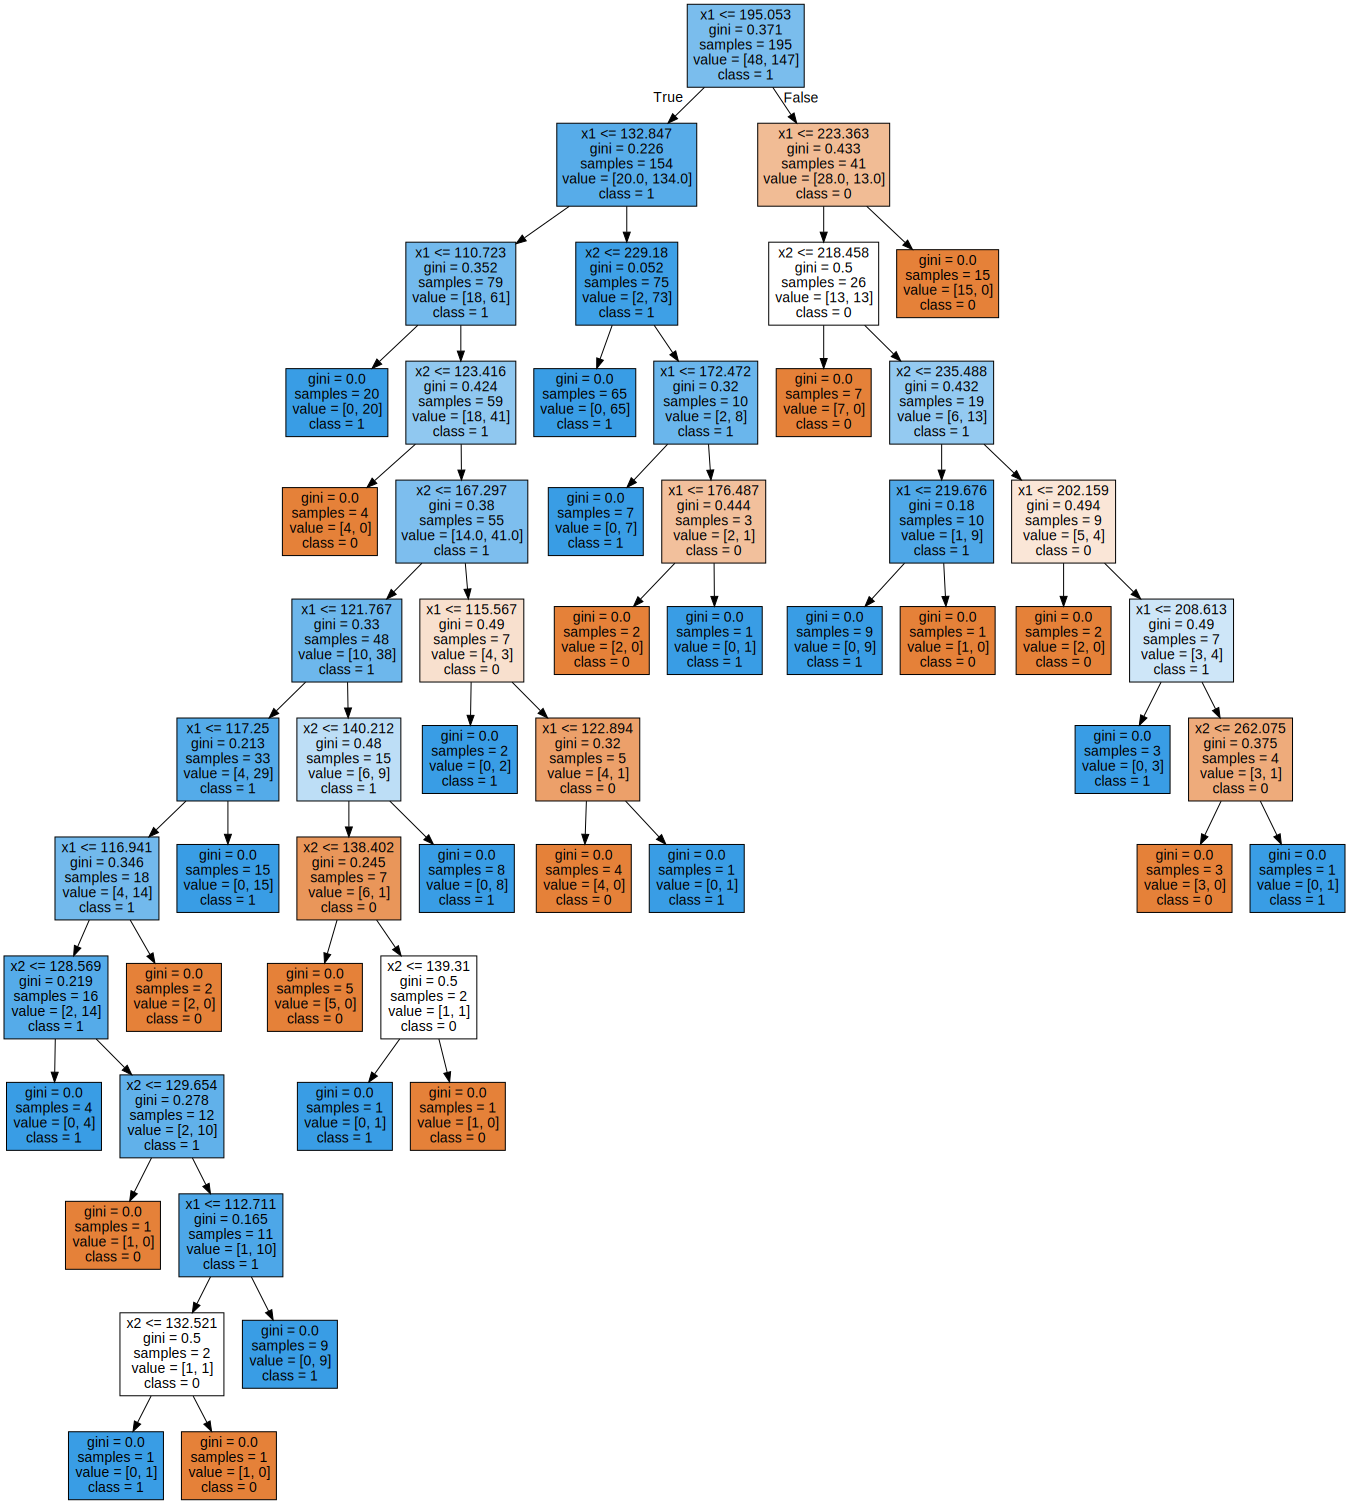

In [21]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model,
    feature_names=['x1', 'x2'],
    class_names=['0', '1'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph